In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

# set color cycle to gradient
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=plt.cm.viridis(np.linspace(0.2, 1, 12)))


In [2]:
# Load the dataset
columns = [
    'Family Name',
    'Variation',
    'Algorithm Name',
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)',
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Parametrized Approximation?',
    'Quantum?',
]
approximation_algorithms = pd.read_csv(
    'approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
approximation_algorithms['Year'] = pd.to_numeric(
    approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# Filter out irrelevant data
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

# # Filter out 0.001 looked at
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']

# # Filter out Parallel algorithms
approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != 1]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']

# remove '?' from 'Type of PTAS (if PTAS)' column
approximation_algorithms['Type of PTAS (if PTAS)'] = approximation_algorithms['Type of PTAS (if PTAS)'].str.replace('?', '')
# trim leading and trailing whitespaces
approximation_algorithms['Type of PTAS (if PTAS)'] = approximation_algorithms['Type of PTAS (if PTAS)'].str.strip()


# if Type of PTAS (if PTAS) is  NaN and Parametrized Approximation? contains yes or yes?, then it is a "parameterized, non-PTAS" algorithm
approximation_algorithms.loc[approximation_algorithms['Type of PTAS (if PTAS)'].isna() & approximation_algorithms['Parametrized Approximation?'].str.contains(
    'yes', case=False, na=False), 'Type of PTAS (if PTAS)'] = 'parameterized, non-PTAS'

# if Type of PTAS (if PTAS) is  NaN and Parametrized Approximation? contains no or no?, then it is a "non-parameterized" algorithm
approximation_algorithms.loc[approximation_algorithms['Type of PTAS (if PTAS)'].isna() & approximation_algorithms['Parametrized Approximation?'].str.contains(
    'no', case=False, na=False), 'Type of PTAS (if PTAS)'] = 'non-parameterized'




# Sort rows
approximation_algorithms.sort_values(
    by=['Family Name', 'Variation', 'Year'], inplace=True)

approximation_algorithms

,Family Name,Looked at?,Relevant?,Variation,Algorithm Name,Year,Time Complexity Class,Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS),Parallel?,Quantum?
153,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Aingworth, Chekuri, Indyk, Motwani",1999,5.5,0,2.00,additive,no,non-parameterized,0,0.0
154,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_2]",2000,5.33,0,2.00,additive,no,non-parameterized,0,0.0
155,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_k]",2000,5.01,0,3.00,additive,yes,"parameterized, non-PTAS",0,0.0
156,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_infty]",2000,5.01,4,0.00,multiplicative,no,non-parameterized,0,0.0
157,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Deng, Kirkpatrick, Rong, V. Williams, Zhong",2022,5.29,0,2.00,additive,no,non-parameterized,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...","Biswas, Raman, Saurabh",2020,8,3,0.00,multiplicative,no,non-parameterized,0,0.0
767,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...",Behnezhad [Theorem 1.3],2021,4,3,5.99,multiplicative-additive,yes,"parameterized, non-PTAS",0,0.0
913,Wiener Index,1,1,Minimum Wiener Connector problem,NaN,2008,5.5,2,0.00,multiplicative,yes,FPTAS,0,0.0
912,Wiener Index,1,1,Minimum Wiener Connector problem,Ruchansky,2015,5.01,4,0.00,multiplicative,no,non-parameterized,0,0.0


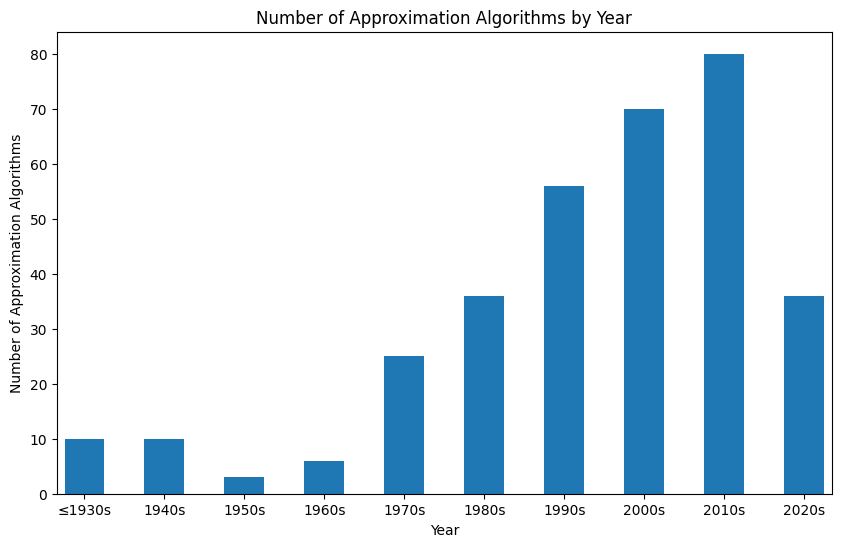

In [3]:
# Plot number of approximation algorithms by decade
data = approximation_algorithms.copy()

data = data.groupby(data['Year'] // 10 * 10).size()

# merge all year <= 1930 into 1930
data[1930] = data.loc[:1930].sum()
data = data.drop(data.loc[:1929].index)


fig, ax = plt.subplots()

bar_container = ax.bar(data.index, data.values, width=5)

# set figure size
fig.set_size_inches(10, 6)

plt.margins(x=0.01)



ax.set_xticks(data.index)
ax.set_xticklabels(['≤1930s'] + [str(year) + 's' for year in data.index[1:]])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year')
plt.show()

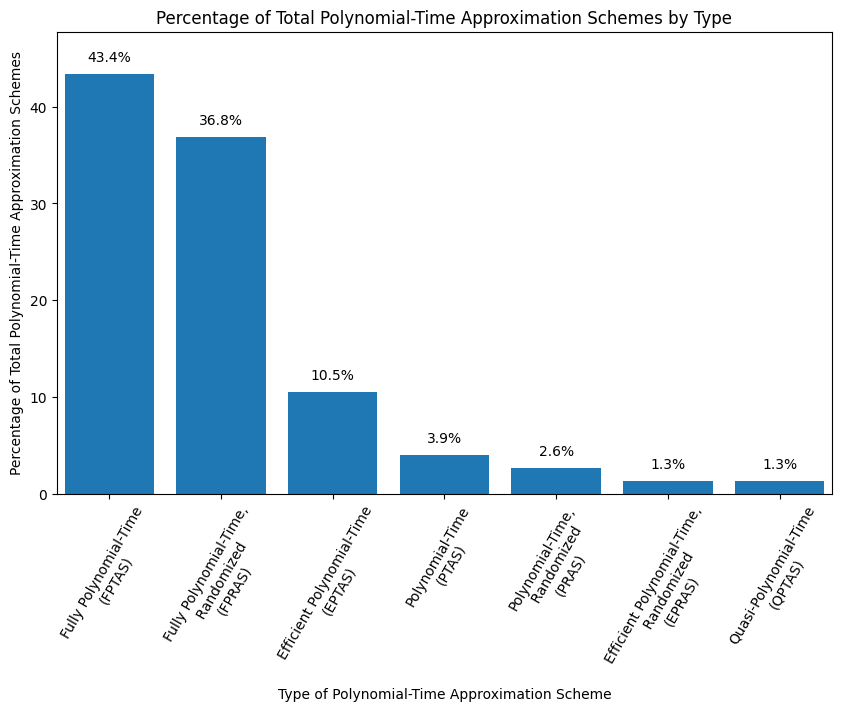

In [42]:
# Plot number of approximation algorithms by type of PTAS
data = approximation_algorithms.copy()
# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

data = data[data['Type of PTAS (if PTAS)'] != 'non-parameterized']
data = data[data['Type of PTAS (if PTAS)'] != 'parameterized, non-PTAS']

data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].transform(
    lambda x: 'Fully Polynomial-Time\n(FPTAS)' if 'FPTAS'==x else (
            'Fully Polynomial-Time,\n Randomized\n(FPRAS)' if 'FPRAS'==x else (
                'Efficient Polynomial-Time\n(EPTAS)' if 'EPTAS'==x else (
                    'Efficient Polynomial-Time,\n Randomized\n(EPRAS)' if 'EPRAS'==x else (
                        'Polynomial-Time\n(PTAS)' if 'PTAS'==x else (
                            'Polynomial-Time,\n Randomized\n(PRAS)' if 'PRAS'==x else (
                                'Quasi-Polynomial-Time\n(QPTAS)' if 'QPTAS'==x else (
                                    'Quasi-Polynomial-Time,\n Randomized\n(QPRAS)' if 'QPRAS'==x else x
                                )
                            )
                        )
                    )
                )
            )
    )
)

data

data = data.groupby(['Type of PTAS (if PTAS)']).size()

total = data.sum()

data = data / total *100

data
# sort bars by count
data = data.sort_values(ascending=False)


fig, ax = plt.subplots()
bar_container = ax.bar(data.index, data.values)
# set figure size
fig.set_size_inches(10, 6)
plt.xticks(rotation=60)

# add labels to bars
for i, v in enumerate(data.values):
    ax.text(i, v + 1, f'{v/100:.1%}', ha='center', va='bottom')

plt.margins(x=0.01, y=0.1)






ax.set_xlabel('Type of Polynomial-Time Approximation Scheme')

ax.set_ylabel('Percentage of Total Polynomial-Time Approximation Schemes')

ax.set_title('Percentage of Total Polynomial-Time Approximation Schemes by Type')

plt.show()

Type of PTAS (if PTAS)
EPTAS                        9
FPTAS                       61
PTAS                         5
QPTAS                        1
non-parameterized          101
parameterized, non-PTAS    154
dtype: int64


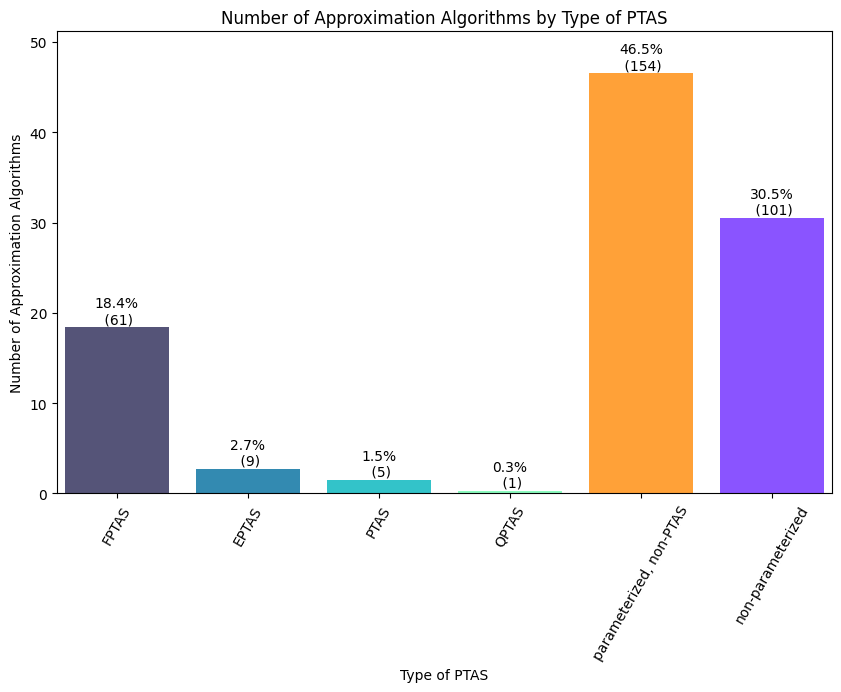

In [5]:
# Plot number of approximation algorithms by type of PTAS
data = approximation_algorithms.copy()



data = data.groupby(['Type of PTAS (if PTAS)']).size()

# Merge "FPTAS" and "FPRAS" into "FPTAS"
data.loc['FPTAS'] = data.loc[['FPTAS', 'FPRAS']].sum()
data = data.drop(['FPRAS'])

# merge  "EPTAS" and "EPRAS" into "EPTAS"
data.loc['EPTAS'] = data.loc[['EPTAS', 'EPRAS']].sum()
data = data.drop(['EPRAS'])

# merge  "PTAS" and "PRAS" into "PTAS"
data.loc['PTAS'] = data.loc[['PTAS', 'PRAS']].sum()
data = data.drop(['PRAS'])

# print count of each type of PTAS
print(data)

# sort like this 'FPTAS', 'FPRAS', 'EPTAS', 'EPRAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized']
data = data.reindex(['FPTAS', 'EPTAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized'])

# convert values to percentage
percentage_data = data / data.sum() * 100



fig, ax = plt.subplots()

colors = [
    '#2a2956cc',
    '#006d9ecc',
    '#00b5bccc',
    '#70fab0cc',
    '#ff8a06cc',
    '#6d29ffcc',
]
bar_container = ax.bar(percentage_data.index, percentage_data.values , color=colors)
# set figure size
fig.set_size_inches(10, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)
 
# add labels to bars with percentage and absolute count 
for i, v in enumerate(percentage_data.values):
    ax.text(i, v + .1, str(round(v, 1)) + '%\n' + ' (' + str(data.values[i]) + ')'
            , ha='center', va='bottom')


ax.set_ymargin(0.1)



ax.set_xlabel('Type of PTAS')

ax.set_ylabel('Number of Approximation Algorithms')

ax.set_title('Number of Approximation Algorithms by Type of PTAS')

plt.show()

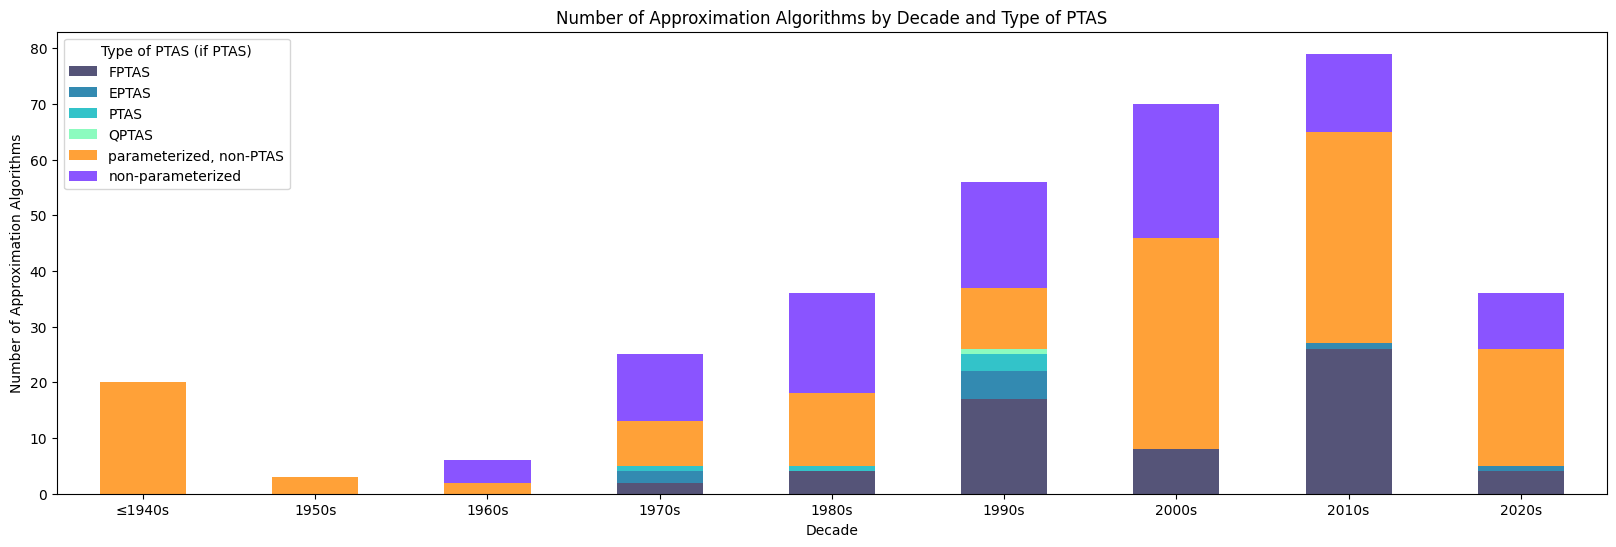

In [6]:
# Plot number of approximation algorithms by type of PTAS by decade
data = approximation_algorithms.copy()

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

# merge all year <= 1930 into 1930
data['Year'] = data['Year'] // 10 * 10
data.loc[data['Year'] <= 1940, 'Year'] = 1940


# Merge "FPTAS" and "FPRAS" into "FPTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(['FPTAS', 'FPRAS']), 'Type of PTAS (if PTAS)'] = 'FPTAS'

# merge  "EPTAS" and "EPRAS" into "EPTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(['EPTAS', 'EPRAS']), 'Type of PTAS (if PTAS)'] = 'EPTAS'

# merge  "PTAS" and "PRAS" into "PTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(['PTAS', 'PRAS']), 'Type of PTAS (if PTAS)'] = 'PTAS'


data = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size()

# sort like this 'FPTAS', 'FPRAS', 'EPTAS', 'EPRAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized']
data = data.unstack().reindex(['FPTAS', 'EPTAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized'], axis=1)



# plot type of PTAS by year
fig, ax = plt.subplots()



colors = [
    '#2a2956cc',
    '#006d9ecc',
    '#00b5bccc',
    '#70fab0cc',
    '#ff8a06cc',
    '#6d29ffcc',
]
# plot stacked bar chart
bar_container = data.plot(kind='bar', stacked=True, ax=ax, color=colors)


# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=0)

plt.margins(x=0.01)

# first label to ≤1940s
plt.xticks(np.arange(0, len(data.index), 1), ['≤1940s'] + [str(year) + 's' for year in data.index[1:]])






ax.set_xlabel('Decade')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Decade and Type of PTAS')
plt.show()



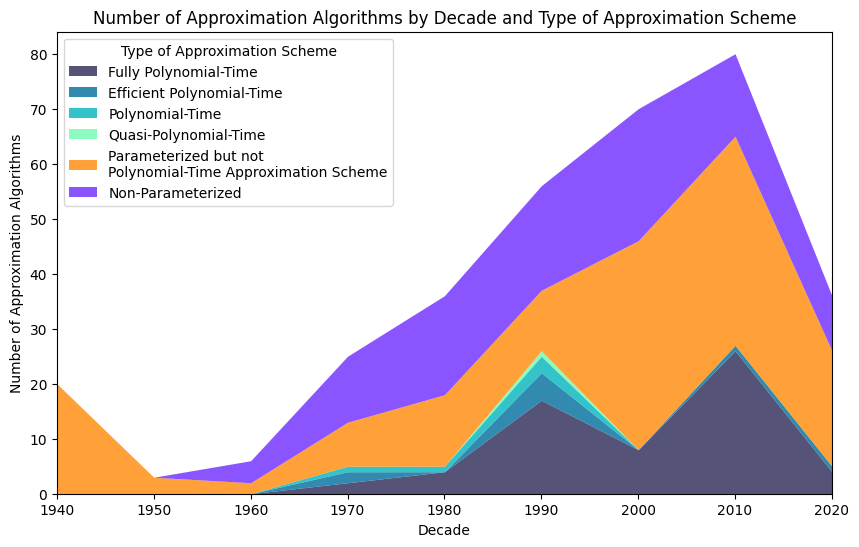

In [48]:
# Plot number of approximation algorithms by type of PTAS by decade
data = approximation_algorithms.copy()

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace(
    '?', '')

# merge all year <= 1940 into 1930
data['Year'] = data['Year'] // 10 * 10
data.loc[data['Year'] <= 1940, 'Year'] = 1940


# Merge "FPTAS" and "FPRAS" into "FPTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(
    ['FPTAS', 'FPRAS']), 'Type of PTAS (if PTAS)'] = 'FPTAS'

# merge  "EPTAS" and "EPRAS" into "EPTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(
    ['EPTAS', 'EPRAS']), 'Type of PTAS (if PTAS)'] = 'EPTAS'

# merge  "PTAS" and "PRAS" into "PTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(
    ['PTAS', 'PRAS']), 'Type of PTAS (if PTAS)'] = 'PTAS'

data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].transform(
    lambda x: 'Fully Polynomial-Time' if 'FPTAS'==x else (
            'Efficient Polynomial-Time' if 'EPTAS'==x else (
                'Polynomial-Time' if 'PTAS'==x else (
                    'Quasi-Polynomial-Time' if 'QPTAS'==x else (
                        'Parameterized but not\nPolynomial-Time Approximation Scheme' if 'parameterized, non-PTAS'==x else 'Non-Parameterized'
                    )
                )
            )
    )
)

data.rename(columns={'Type of PTAS (if PTAS)':'Type of Approximation Scheme'}, inplace=True)

data = data.groupby(['Year', 'Type of Approximation Scheme']).size()

# sort like this 'FPTAS', 'FPRAS', 'EPTAS', 'EPRAS', 'PTAS', 'QPTAS', 'parameterized, non-PTAS', 'non-parameterized']
data = data.unstack().reindex(
    ['Fully Polynomial-Time', 'Efficient Polynomial-Time', 'Polynomial-Time', 'Quasi-Polynomial-Time', 'Parameterized but not\nPolynomial-Time Approximation Scheme', 'Non-Parameterized'], axis=1)


# plot type of PTAS by year
fig, ax = plt.subplots()

fig.set_size_inches(10, 6)

colors = [
    '#2a2956cc',
    '#006d9ecc',
    '#00b5bccc',
    '#70fab0cc',
    '#ff8a06cc',
    '#6d29ffcc',
]

# plot stacked area chart
bar_container = data.plot(kind='area', stacked=True, ax=ax, color=colors, linewidth=0)

plt.margins(x=0.0)


ax.set_xlabel('Decade')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Decade and Type of Approximation Scheme')
plt.show()

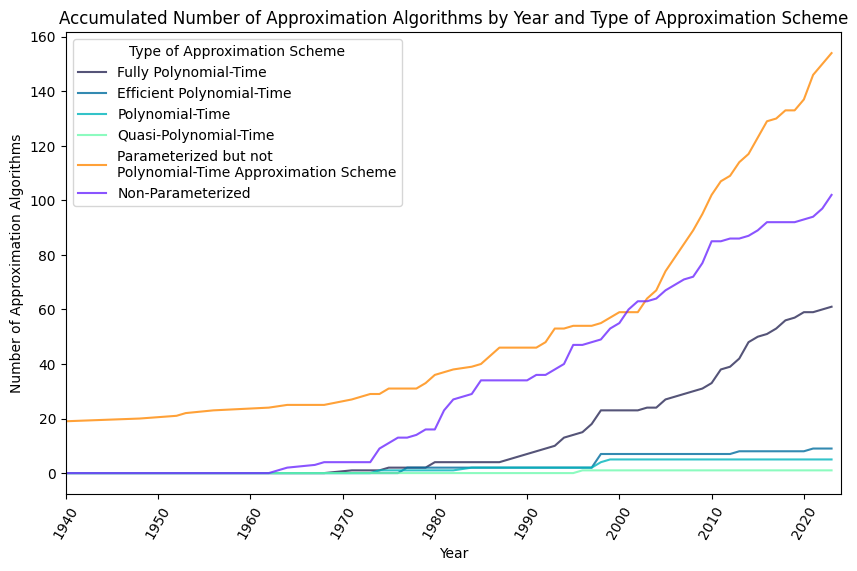

In [49]:
# Plot accumulated number of approximation algorithms by year
data = approximation_algorithms.copy()

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

# Merge "FPTAS" and "FPRAS" into "FPTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(['FPTAS', 'FPRAS']), 'Type of PTAS (if PTAS)'] = 'FPTAS'

# merge  "EPTAS" and "EPRAS" into "EPTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(['EPTAS', 'EPRAS']), 'Type of PTAS (if PTAS)'] = 'EPTAS'

# merge  "PTAS" and "PRAS" into "PTAS"
data.loc[data['Type of PTAS (if PTAS)'].isin(['PTAS', 'PRAS']), 'Type of PTAS (if PTAS)'] = 'PTAS'

data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].transform(
    lambda x: 'Fully Polynomial-Time' if 'FPTAS'==x else (
            'Efficient Polynomial-Time' if 'EPTAS'==x else (
                'Polynomial-Time' if 'PTAS'==x else (
                    'Quasi-Polynomial-Time' if 'QPTAS'==x else (
                        'Parameterized but not\nPolynomial-Time Approximation Scheme' if 'parameterized, non-PTAS'==x else 'Non-Parameterized'
                    )
                )
            )
    )
)

data.rename(columns={'Type of PTAS (if PTAS)':'Type of Approximation Scheme'}, inplace=True)

ptas_type_count_per_year = data.groupby(['Year', 'Type of Approximation Scheme']).size().unstack(fill_value=0).reindex(
    ['Fully Polynomial-Time', 'Efficient Polynomial-Time', 'Polynomial-Time', 'Quasi-Polynomial-Time', 'Parameterized but not\nPolynomial-Time Approximation Scheme', 'Non-Parameterized'], axis=1)

# accumulated number of each type of PTAS per year
ptas_type_count_per_year = ptas_type_count_per_year.cumsum()

colors = [
    '#2a2956cc',
    '#006d9ecc',
    '#00b5bccc',
    '#70fab0cc',
    '#ff8a06cc',
    '#6d29ffcc',
]
fig, ax = plt.subplots()
ptas_type_count_per_year.plot(kind='line', ax=ax, color=colors)
# set figure size
fig.set_size_inches(10, 6)
plt.xticks(rotation=60)
plt.xlim(1940, 2024)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Accumulated Number of Approximation Algorithms by Year and Type of Approximation Scheme')
plt.show()





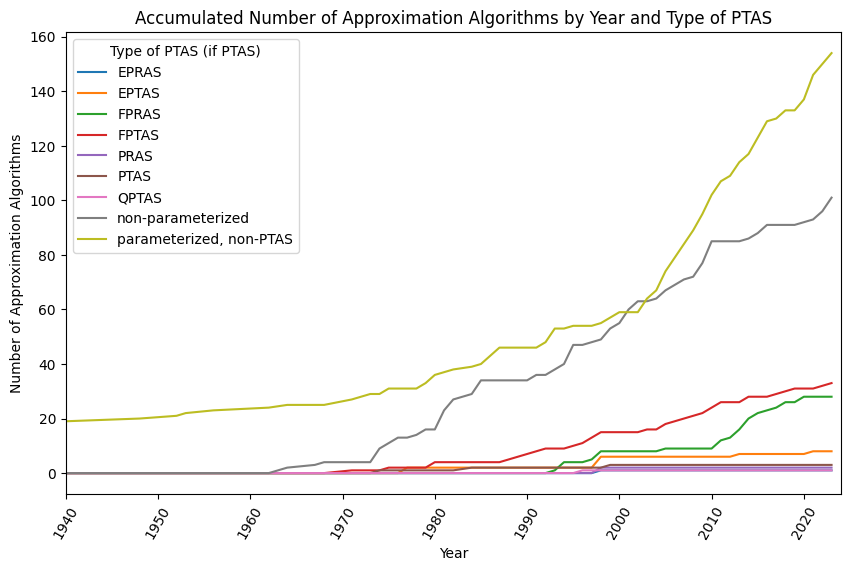

In [9]:
# Plot accumulated number of approximation algorithms by year
data = approximation_algorithms.copy()

# remove '?' from 'Type of PTAS (if PTAS)' column
data['Type of PTAS (if PTAS)'] = data['Type of PTAS (if PTAS)'].str.replace('?', '')

ptas_type_count_per_year = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size().unstack(fill_value=0)

# accumulated number of each type of PTAS per year
ptas_type_count_per_year = ptas_type_count_per_year.cumsum()


fig, ax = plt.subplots()
ptas_type_count_per_year.plot(kind='line', ax=ax)
# set figure size
fig.set_size_inches(10, 6)
plt.xticks(rotation=60)
plt.xlim(1940, 2024)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Accumulated Number of Approximation Algorithms by Year and Type of PTAS')
plt.show()


['non-parameterized' 'parameterized, non-PTAS' 'FPTAS' 'FPRAS' 'PRAS'
 'PTAS' 'EPTAS' 'QPTAS' 'EPRAS']


/var/folders/lx/jxx7wnmn4q5g51lkvkx6hndc0000gn/T/ipykernel_3112/1154944834.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


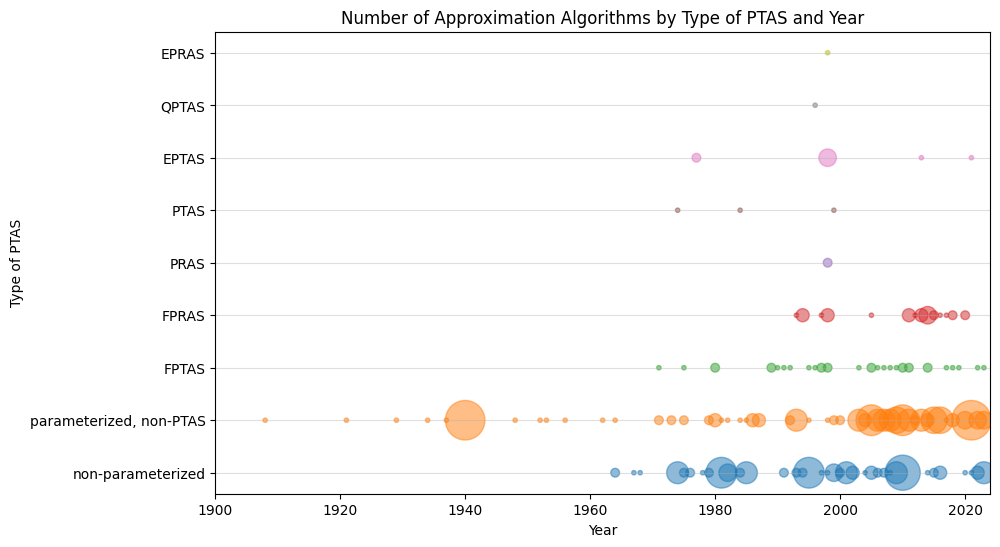

In [10]:
data = approximation_algorithms.copy()
types_of_ptas = data['Type of PTAS (if PTAS)'].dropna().unique()


print(types_of_ptas)

# count of each type of PTAS by year
data = data.groupby(['Year', 'Type of PTAS (if PTAS)']).size()
data = data.unstack(fill_value=0)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 6)
ax.grid(axis='y', alpha=0.4)
ylabels = [""]
for i, ptas_type in enumerate(types_of_ptas):
    ylabels.append(ptas_type)

for i, ptas_type in enumerate(types_of_ptas):
    x = data.index
    y = np.full_like(x, i)
    s = data[ptas_type].values
    ax.scatter(x, y, s=10*s**2, alpha=0.5, label=ptas_type)

plt.xlim(1900, 2024)


ax.set_yticklabels(ylabels)
ax.set_xlabel('Year')
ax.set_ylabel('Type of PTAS')
ax.set_title('Number of Approximation Algorithms by Type of PTAS and Year')


# plt.legend(title='Type of PTAS')
plt.show()


